
0: 384x640 (no detections), 356.0ms
Speed: 1.8ms preprocess, 356.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


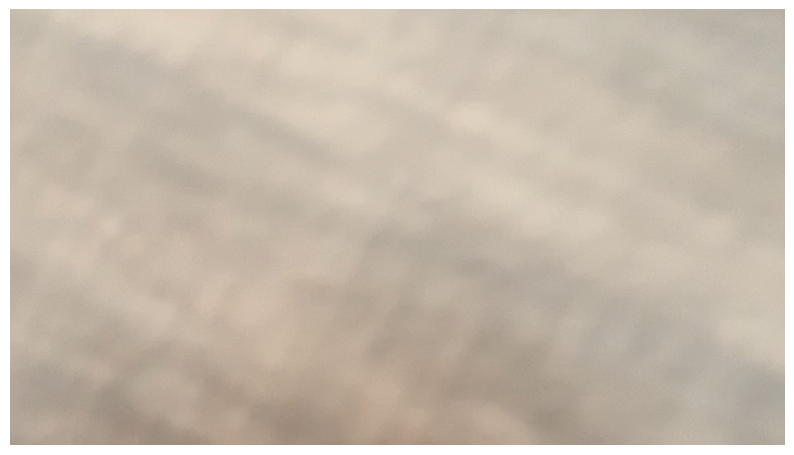


0: 384x640 (no detections), 348.3ms
Speed: 2.6ms preprocess, 348.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


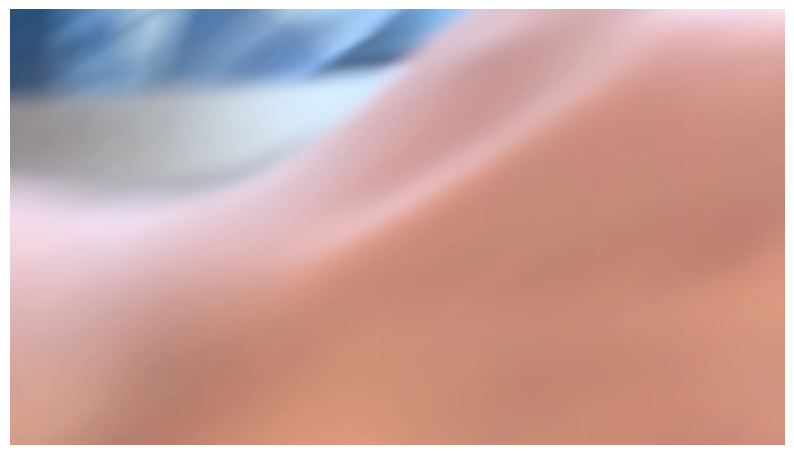


0: 384x640 (no detections), 349.2ms
Speed: 1.7ms preprocess, 349.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


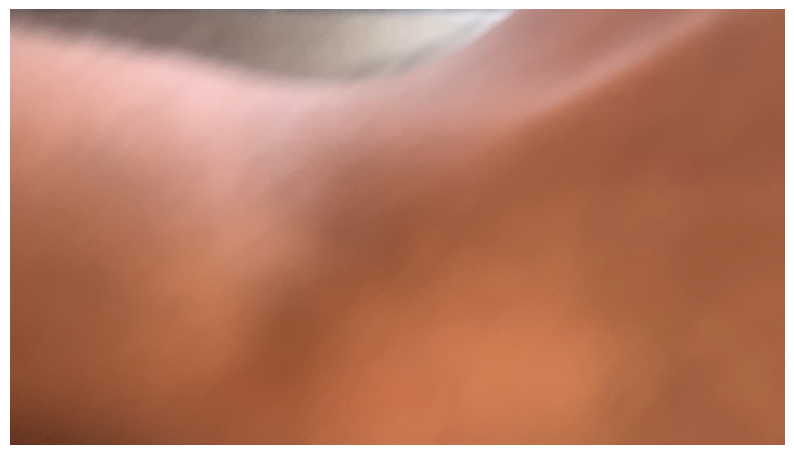


0: 384x640 1 person, 346.8ms
Speed: 1.6ms preprocess, 346.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


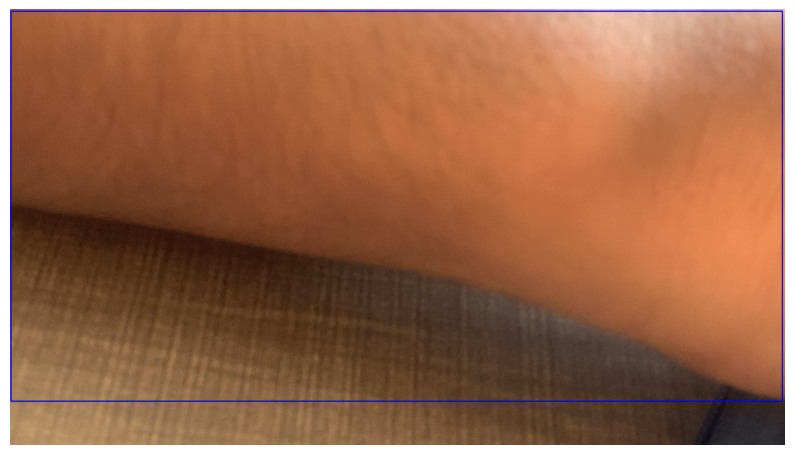

gTTSError: Failed to connect. Probable cause: Unknown

In [3]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from gtts import gTTS
from IPython.display import Audio, display

# Initialize YOLO model
model = YOLO("yolov9c.pt")

# Function to predict and detect objects in an image
def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = chosen_model.predict(img, conf=conf)

    detected_objects = []

    for result in results:
        for box in result.boxes:
            class_name = result.names[int(box.cls[0])]
            detected_objects.append(class_name)

            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{class_name}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)

    return img, detected_objects

# Function to convert text to speech using gTTS
def text_to_speech(text, filename):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)

# Video capture from default camera
cap = cv2.VideoCapture(0)  # Change to 0 or another camera index as needed

# Check if camera is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam.")

try:
    while True:
        # Read frame from the camera
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        result_frame, detected_objects = predict_and_detect(model, frame, classes=[])

        # Display the processed frame
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Convert detected objects to audio
        for obj in detected_objects:
            # Generate text to speech
            text = f"{obj} is detected."
            audio_filename = f"{obj}_prediction.mp3"
            text_to_speech(text, audio_filename)
            print(f"Text '{text}' converted to audio '{audio_filename}'")

            # Display and play the audio in Jupyter Notebook
            display(Audio(audio_filename, autoplay=True))

        # Wait for a short duration and check for key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    # Release resources
    cap.release()
    cv2.destroyAllWindows()